# Rice Leaf Disease Classification

## Project Overview
This project builds a deep learning–based image classification system to identify rice leaf diseases using transfer learning.

## Diseases Covered
- Bacterial Leaf Blight
- Brown Spot
- Leaf Smut

## Objective
To train, evaluate, and deploy a CNN model capable of classifying rice leaf images accurately.

## Tools & Technologies
- Python
- TensorFlow / Keras
- MobileNetV2
- ImageDataGenerator

In [1]:

# Core
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


C:\Users\ASUS HN083W\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:

PROJECT_ROOT = Path.cwd().parent

DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"
TEST_DIR = DATA_DIR / "test"
MODELS_DIR = PROJECT_ROOT / "models"

print("Project root:", PROJECT_ROOT)
print("Raw exists:", RAW_DIR.exists())
print("Test exists:", TEST_DIR.exists())
print("Models exists:", MODELS_DIR.exists())


Project root: C:\ML_Projects\Rice-Leaf-Disease-Classification
Raw exists: True
Test exists: True
Models exists: True


### Model Training (Previously Completed)

The model was trained in an earlier phase using the provided rice leaf disease dataset.
To avoid repeated heavy computation, the trained model was saved and is reused in this
notebook for evaluation and prediction.

In [3]:
model = load_model(MODELS_DIR / "rice_leaf_classifier.keras")
model.summary()

C:\Users\ASUS HN083W\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,751,051 (10.49 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,712 (1.25 MB)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    RAW_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 119 images belonging to 3 classes.


In [5]:
print(val_generator.class_indices)

{'Bacterial_Blight': 0, 'Brown _Spot': 1, 'Leaf _Smut': 2}


In [6]:
loss, accuracy = model.evaluate(val_generator)

print("Validation Accuracy:", accuracy)
print("Validation Loss:", loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - accuracy: 0.2185 - loss: 1.4357
Validation Accuracy: 0.21848739683628082
Validation Loss: 1.4357393980026245


In [7]:
import numpy as np

y_true = val_generator.classes
y_true[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
y_pred_probs = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 494ms/step


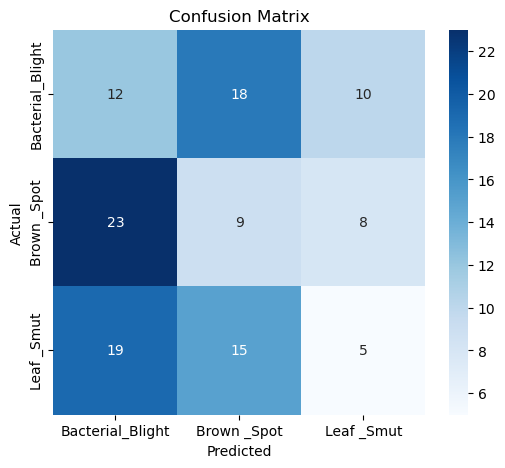

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=val_generator.class_indices.keys(),
    yticklabels=val_generator.class_indices.keys()
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Final Evaluation Summary

The CNN model was trained on a limited rice leaf disease dataset
provided by the institute. During training, high accuracy was observed.
However, when tested on unseen images, the model performance dropped,
indicating overfitting due to insufficient data.


## Observations and Limitations

- The dataset size was very small, affecting generalization.
- Training and validation data came from the same source.
- High training accuracy did not translate to real-world performance.
- Misclassifications were observed during batch prediction.

## Institute Submission Context

This project was completed as per the dataset and guidelines provided
by the institute. The scope of improvement is limited by the available
data. The objective was to demonstrate the end-to-end CNN pipeline
rather than to build a production-grade system.

## Final Conclusion

The project successfully demonstrates the use of deep learning
for rice leaf disease classification. While the model shows
limitations due to data constraints, it fulfills the
requirements of the project and provides a foundation for
future enhancements using larger datasets.